In [1]:
import os, sys
import pandas as pd
import pickle
from os.path import dirname, abspath
d = os.path.abspath(os.path.join('..'))
sys.path.append(d)
from model_trial import Experiment
from util.file_processor import FileProcessor
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 8, 'figure.figsize' : [1.5*3.125, 1.5*1.5],
                           'legend.fontsize': 10, 'legend.fancybox': True,
                           'font.family': 'serif', 'font.sans-serif': 'Times',
                            'xtick.major.width': 0.2, 'xtick.minor.width': 2*0.2,
                            'ytick.major.width': 0.2, 'ytick.minor.width': 2*0.2,
                            'text.usetex': False, 'axes.labelsize': 7*2
                           })
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import numpy as np
import re
import graphviz
import pathlib

In [15]:
df1 = pd.read_csv('../../data/mlab_query_zero_loss_results.csv')
df1 = df1.dropna()
df1 = df1[(df1['std_th'] < df1['avg_th']) & (df1['std_lat'] < df1['avg_rtt'])]

Text(0.5, 0, 'Throughput')

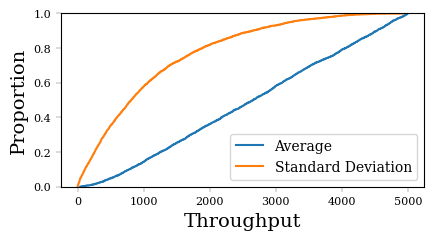

In [29]:
fig, ax = plt.subplots(1, 1)
sns.ecdfplot(data = df1, x = 'avg_th', ax=ax, label='Average')
sns.ecdfplot(data = df1, x = 'std_th', ax=ax, label='Standard Deviation')
plt.legend()
plt.xlabel('Throughput')

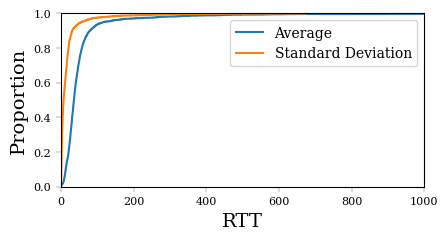

In [28]:
fig, ax = plt.subplots(1, 1)
sns.ecdfplot(data = df1, x = 'avg_rtt', ax=ax, label='Average')
sns.ecdfplot(data = df1, x = 'std_lat', ax=ax, label='Standard Deviation')
plt.xlim([0, 1000])
plt.xlabel('RTT')
plt.legend()

In [40]:
data = []
for i in range(5):
    df = df1[(df1['avg_th'] > 100) & (df1['avg_th'] >= 1000*i) & (df1['avg_th'] <= 1000*(i+1))]
    data.append(df.sample(n = 60))
df = pd.concat(data, axis=0)
df

,IP,avg_th,std_th,avg_rtt,std_lat,avg_loss
2934,2607:fb90:2bd:f007:2cde:486c:f981:d6d5,722.72,85.96,121.93,5.01,0.46
1772,2601:241:8e82:2930:45de:9a2c:a7ab:981c,814.50,225.51,8.73,1.68,0.09
2700,98.52.220.150,828.14,823.49,34.63,27.64,0.87
3083,2601:240:cd08:757f:46c:6a4b:aa43:7f39,667.84,478.62,24.54,7.58,0.69
2287,2607:fb90:a101:1f64:39a3:dc17:d4cf:cf78,709.73,405.39,27.07,0.51,0.59
...,...,...,...,...,...,...
3304,2607:fb90:9b39:5c31:ac57:eab7:2b1f:ca4,4645.34,2699.96,22.72,5.77,0.00
2791,2607:fb90:a1b8:abbb:189b:6694:d84f:d8d9,4282.55,2046.12,58.25,4.24,0.01
880,2607:fb90:9b20:ae7e:556:3663:84a9:858,4496.94,3258.01,26.37,7.98,0.09
1474,2603:300a:134:f2c0:841a:3334:cf67:f253,4313.49,3765.08,11.52,2.10,0.48


Text(0.5, 0, 'Throughput')

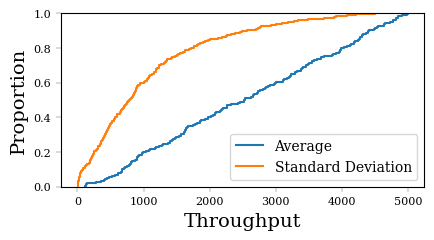

In [41]:
fig, ax = plt.subplots(1, 1)
sns.ecdfplot(data = df, x = 'avg_th', ax=ax, label='Average')
sns.ecdfplot(data = df, x = 'std_th', ax=ax, label='Standard Deviation')
plt.legend()
plt.xlabel('Throughput')

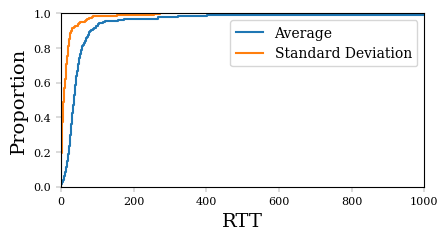

In [42]:
fig, ax = plt.subplots(1, 1)
sns.ecdfplot(data = df, x = 'avg_rtt', ax=ax, label='Average')
sns.ecdfplot(data = df, x = 'std_lat', ax=ax, label='Standard Deviation')
plt.xlim([0, 1000])
plt.xlabel('RTT')
plt.legend()

In [49]:
def generate_trace(tput, tj, lat, lj, lo, idx):
    curr = 0
    tput = int(tput)
    tj = int(tj)
    lat = int(lat)
    lj = int(lj)
    trace_name = '_'.join(map(str, [tput, tj, lat, lj, lo, idx]))
    with open(f'../../data/zero_loss_traces/{trace_name}.csv', 'w') as fd:
        while curr < 50:
            tval = int(np.random.normal(tput, tj))
            lval = int(np.random.normal(lat, lj))
            if tval < 100: 
                tval = 100
            if lval < 0:
                lval = 0
            fd.write(f'{tval},{lval},{lo}\n')
            curr += 1

In [50]:
i = 1
for idx, row in df.iterrows():
    generate_trace(row['avg_th'], row['std_th'], row['avg_rtt'], row['std_lat'], 0, i)
    i += 1